In [1]:
%matplotlib inline

**Example code 24: Obtain a Quine code to reproduce the pCMV-Target-AID**  
We simulated the construction process of pCMV-Target-AID plasmid, which was constructed by assembling two fragments encoding the N- and C-terminus halves of Target-AID. They were both amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129 and HM128/RS046, respectively, with a backbone fragment amplified from pCMV-ABE7.10 using RS047/RS048. Firtst , the construction process was simulated using QUEEN module, and the GenBank output was generated. Then, the GenBank output was loaded as input, and the quine code to reproduce the GenBank file itself was generated by quine function.

In [2]:
import sys 
sys.path.append("../../")
from QUEEN.queen import *
set_namespace(globals()) 

In [3]:
#Load the backbone plasimids from GenBank inputs
QUEEN(record="input/addgene_79620.gbk", product="pCMV_nCas_PmCDA1_ugi", project="pCMV-nCas-PmCDA1-ugi")
QUEEN(record="input/addgene_102919.gbk", product="pCMV_ABE", project="pCMV_ABE")

<queen.QUEEN object; project='pCMV-ABE', length='8727 bp', topology='circular'>

In [4]:
#Simulate the PCR process to amlify N-terminus of Target-AID
description1 = "The N-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT)\
 (Addgene 79620) using primer pairs RS045/HM129."
QUEEN(seq="GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG",   product="RS045", process_description=description1)
QUEEN(seq="CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA", product="HM129", process_description=description1)
pCMV_nCas_PmCDA1_ugi.searchsequence(RS045.seq[-18:], product="FW1", process_description=description1) #Search FW primer binding region
pCMV_nCas_PmCDA1_ugi.searchsequence(HM129.seq[-18:], product="RV1", process_description=description1) #Search RV primer binding region
cropdna(pCMV_nCas_PmCDA1_ugi, FW1[0].end, RV1[0].start, product="fragment1", process_description=description1)
modifyends(fragment1, RS045.seq, HM129.rcseq, product="fragment1", process_description=description1) #Simulate PCR

<queen.QUEEN object; project='pCMV-nCas-PmCDA1-ugi', length='2596 bp', topology='linear'>

In [5]:
#Simulate the PCR process to amlify C-terminus of Target-AID
description2 = "The C-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT)\
 (Addgene 79620) using primer pairs HM128/RS046."
QUEEN(seq="CTACGACGTGGATCATATCGTGCCCCAGTCTTTTC",  product="HM128", process_description=description2)
QUEEN(seq="TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC", product="RS046", process_description=description2)
pCMV_nCas_PmCDA1_ugi.searchsequence(HM128.seq[-18:],  product="FW2", process_description=description2)
pCMV_nCas_PmCDA1_ugi.searchsequence(RS046.seq[-18:],  product="RV2", process_description=description2)
cropdna(pCMV_nCas_PmCDA1_ugi, FW2[0].end, RV2[0].start, product="fragment2", process_description=description2)
modifyends(fragment2, HM128.seq, RS046.rcseq, product="fragment2", process_description=description2)

<queen.QUEEN object; project='pCMV-nCas-PmCDA1-ugi', length='2831 bp', topology='linear'>

In [6]:
#Simulate the PCR process to amplify a backbone fragment
description3 = "The backbone fragment was amplified from pCMV-ABE7.10 using RS047/RS048."
QUEEN(seq="ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC", product="RS047", process_description=description3) 
QUEEN(seq="CTTCGGTGCCATGGTGGCGGCTCTCCCTATAG",    product="RS048", process_description=description3)
pCMV_ABE.searchsequence(RS047.seq[-18:], product="FW3", process_description=description3)[0] 
pCMV_ABE.searchsequence(RS048.seq[-18:], product="RV3", process_description=description3)[0]
cropdna(pCMV_ABE, FW3[0].end, RV3[0].start, product="fragment3", process_description=description3)
modifyends(fragment3, RS047.seq, RS048.rcseq, product="fragment3", process_description=description3)

<queen.QUEEN object; project='pCMV-ABE', length='3403 bp', topology='linear'>

In [7]:
#Gibson Assembly
description4 = "The Target-AID plasmid (pCMV-Target-AID) was constructed\
 by assembling two insert fragments and a backbone fragments."
modifyends(fragment1, "*{25}/-{25}","-{28}/*{28}", product="fragment1", process_description=description4)
modifyends(fragment2, "*{28}/-{28}","-{25}/*{25}", product="fragment2", process_description=description4)
modifyends(fragment3, "*{25}/-{25}","-{25}/*{25}", product="fragment3", process_description=description4) 
joindna(fragment1, fragment2, fragment3, topology="circular", project="pCMV-Target-AID", product="pCMV_Target_AID", process_description=description4)

<queen.QUEEN object; project='pCMV-Target-AID', length='8752 bp', topology='circular'>

In [8]:
pCMV_Target_AID.writedna("output/pCMV-Target-AID.gbk")
pCMV_Target_AID.printfeature()

feature_id  feature_type  qualifier:label     start  end   strand  
1           source        null                0      3308  +       
100         primer_bind   M13 rev             275    292   -       
200         primer_bind   M13 Reverse         275    292   -       
300         primer_bind   M13/pUC Reverse     288    311   -       
400         protein_bind  lac operator        299    316   +       
500         promoter      lac promoter        323    354   -       
600         protein_bind  CAP binding site    368    390   +       
700         primer_bind   L4440               506    524   -       
800         rep_origin    ori                 677    1266  -       
900         primer_bind   pBR322ori-F         757    777   -       
1000        CDS           AmpR                1436   2297  -       
1100        primer_bind   Amp-R               2059   2079  +       
1200        promoter      AmpR promoter       2297   2402  -       
1300        primer_bind   pRS-marker          24

In [9]:
pCMV_Target_AID = QUEEN(record="output/pCMV-Target-AID.gbk")
quine(pCMV_Target_AID, output="output/pCMV-Target-AID_reconstruction.py")

In [10]:
!pwd
!cat output/pCMV-Target-AID_reconstruction.py 
!/usr/local/bin/python3 output/pCMV-Target-AID_reconstruction.py > output/reconstructed_pCMV-Target-AID.gbk
!diff -s output/pCMV-Target-AID.gbk output/reconstructed_pCMV-Target-AID.gbk

/Users/hideto/Dropbox (Yachie Lab)/HIDETO_MORI.LAB/Experiments/Project/Dbrick/github/demo/tutorial
import sys
sys.path.append("/Users/hideto/Dropbox (Yachie Lab)/HIDETO_MORI.LAB/Experiments/Project/Dbrick/github/demo/tutorial/../..")
from QUEEN.queen import *
set_namespace(globals())
QUEEN(record='input/addgene_79620.gbk', project='pCMV-nCas-PmCDA1-ugi', product='pCMV_nCas_PmCDA1_ugi')
QUEEN(record='input/addgene_102919.gbk', project='pCMV_ABE', product='pCMV_ABE')

description1 = 'The N-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129.'
QUEEN(seq='GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG', product='RS045', process_description=description1)
QUEEN(seq='CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA', product='HM129', process_description=description1)
pCMV_nCas_PmCDA1_ugi.searchsequence(query=RS045.seq[-18:], product='FW1', process_description=description1)
pCMV_nCas_PmCDA1_ugi.searchsequence(query=HM129.seq[-18:], produc

In [11]:
from QUEEN.qgraph import *
graph = traceflow(pCMV_Target_AID) 
print(graph.source)

digraph cluster_operation {
	rankdir=LR
	fontname=arial
	nodesep=0.1
	ranksep=0.1
	"pCMV-nCas-PmCDA1-ugi_0" [label=pCMV_nCas_PmCDA1_ugi fontname=Arial margin=0.01 shape=oval]
	"pCMV-ABE_0" [label=pCMV_ABE fontname=Arial margin=0.01 shape=oval]
	dna_0 [label=RS045 fontname=Arial margin=0.01 shape=oval]
	dna_1 [label=HM129 fontname=Arial margin=0.01 shape=oval]
	"pCMV-nCas-PmCDA1-ugi_1" [label=fragment1 fontname=Arial margin=0.01 shape=oval]
	cropdna_4 [label=<<table border="0" cellborder="1" cellspacing="0" cellpadding="1"><tr><td port="func" border="1" bgcolor="#909090"><font color="white" point-size="16"><b> </b>cropdna<b> </b></font></td></tr><tr><td port="start" border="1" align="left"><b> </b><i>start </i> = 3914</td></tr><tr><td port="end" border="1" align="left"><b> </b><i>end </i> = 6442</td></tr></table>> fontname=Arial shape=plaintext]
	"pCMV-nCas-PmCDA1-ugi_0" -> cropdna_4:func [arrowhead=dot]
	cropdna_4:func -> "pCMV-nCas-PmCDA1-ugi_1"
	"pCMV-nCas-PmCDA1-ugi_2" [label=fragme

In [12]:
pCMV_Target_AID.printfeature()
description5 = "Extract a fragment spanning from 8,000 nt to 2,000 nt of pCMV-Target-AID"
cropdna(pCMV_Target_AID, 8000, 2000, product="fragment", process_description=description5)
quine(fragment)

feature_id  feature_type  qualifier:label     start  end   strand  
1           source        null                0      3308  +       
100         primer_bind   M13 rev             275    292   -       
200         primer_bind   M13 Reverse         275    292   -       
300         primer_bind   M13/pUC Reverse     288    311   -       
400         protein_bind  lac operator        299    316   +       
500         promoter      lac promoter        323    354   -       
600         protein_bind  CAP binding site    368    390   +       
700         primer_bind   L4440               506    524   -       
800         rep_origin    ori                 677    1266  -       
900         primer_bind   pBR322ori-F         757    777   -       
1000        CDS           AmpR                1436   2297  -       
1100        primer_bind   Amp-R               2059   2079  +       
1200        promoter      AmpR promoter       2297   2402  -       
1300        primer_bind   pRS-marker          24

pCMV-nCas9-pmCDA1-ugi:N-term


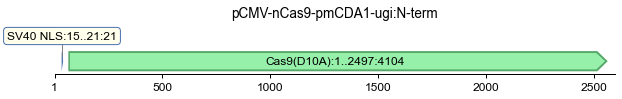

In [13]:
fragment1.project = "pCMV-nCas9-pmCDA1-ugi:N-term"
print(fragment1.project)
fig1=visualize(fragment1)

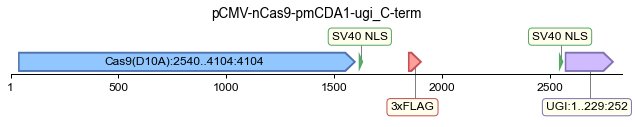

In [14]:
fragment2.project = "pCMV-nCas9-pmCDA1-ugi_C-term"
fig2=visualize(fragment2)
#fig2=visualize(cropdna(frag2,500,1000))

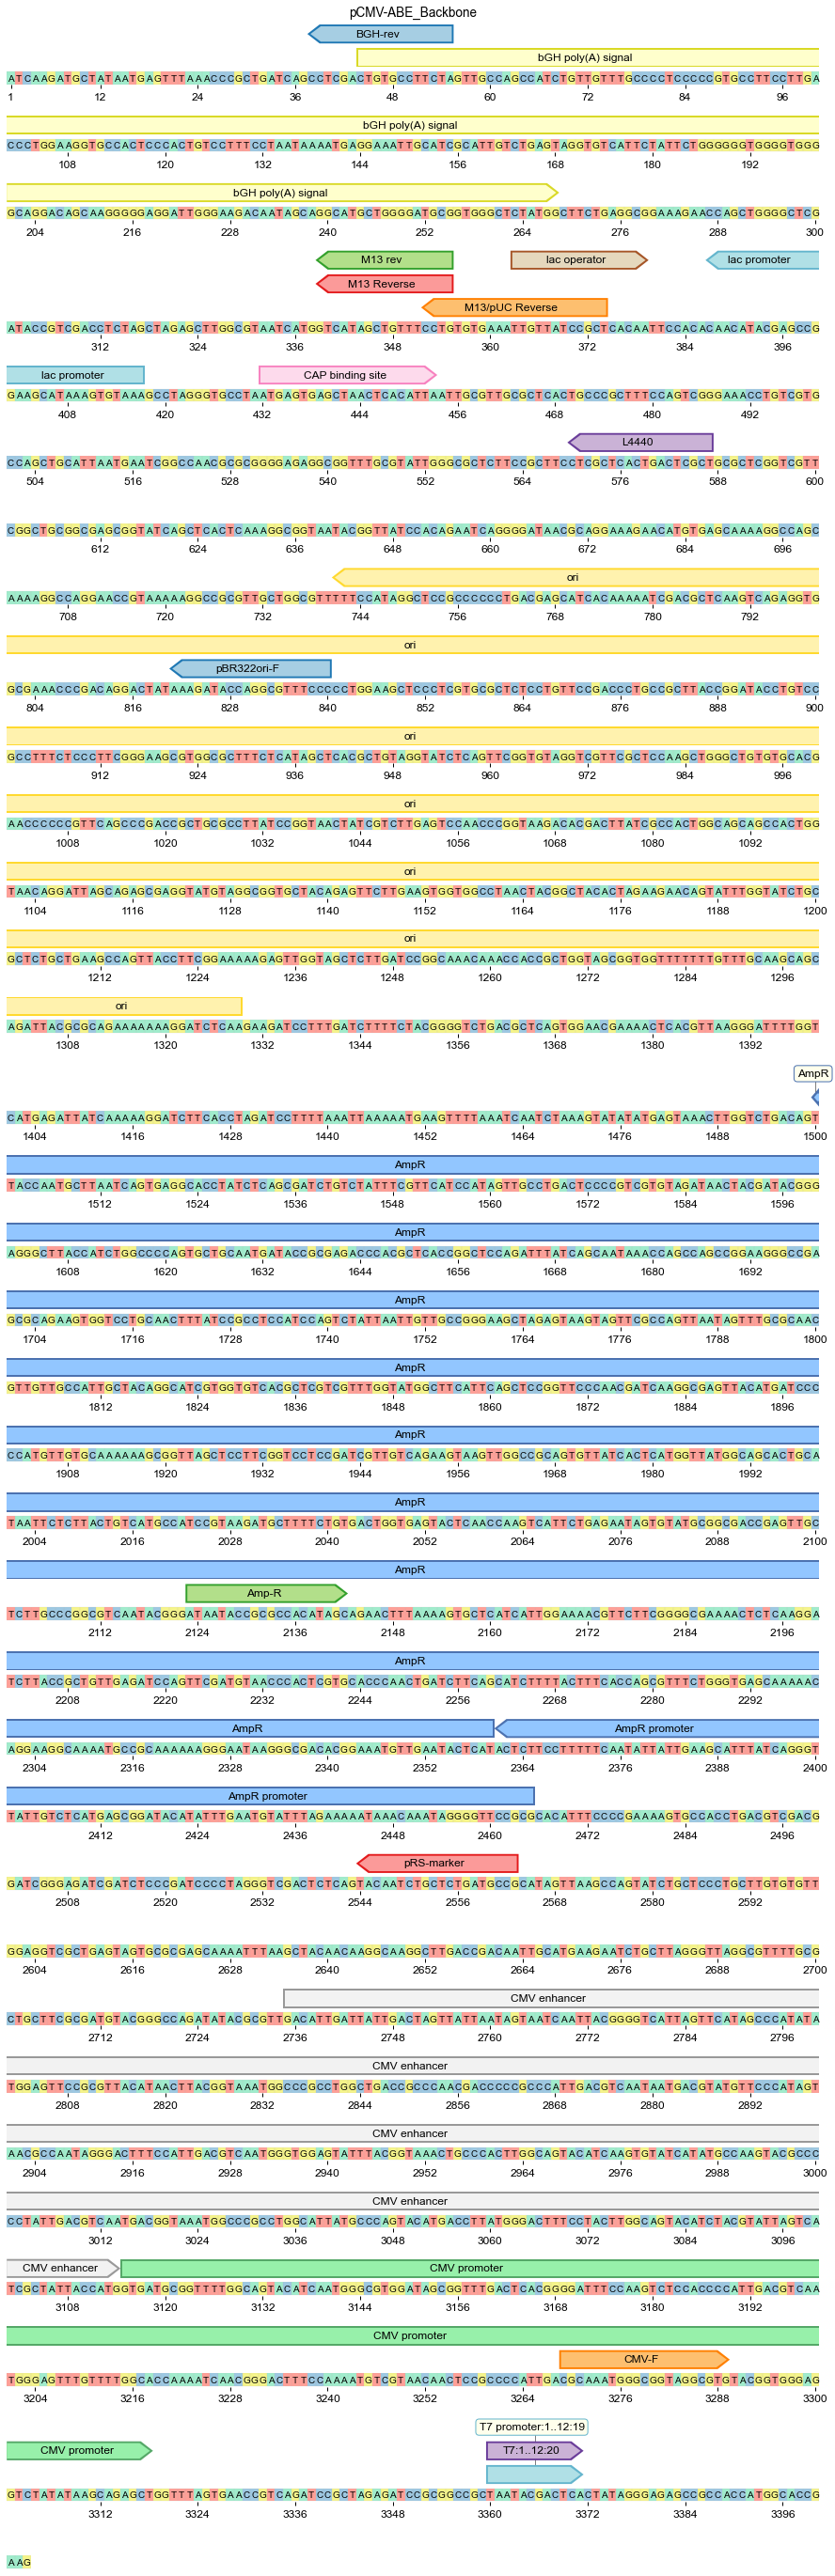

In [15]:
fragment3.project = "pCMV-ABE_Backbone"
fig3 = visualize(fragment3, linebreak=100, seq=True)

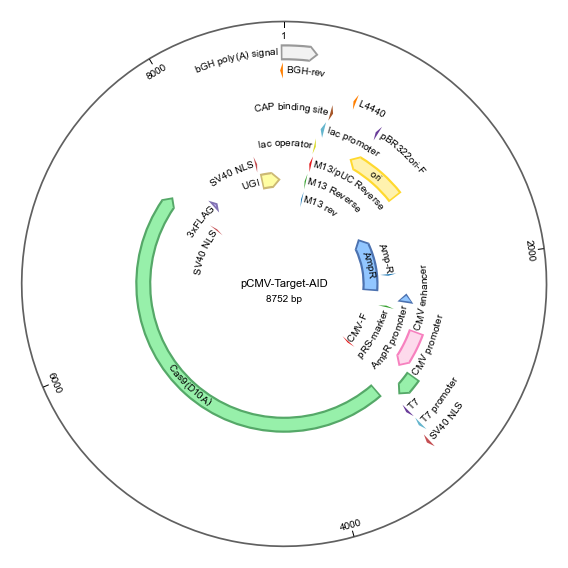

In [16]:
fig4 = visualize(pCMV_Target_AID, map_view="circular")